In [1]:
import warnings
warnings.filterwarnings("ignore")

# this has been run on local machine

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#do not use these variable names: f0, f1, f2, g1, g2, g3, g5, f_new1, f_new2, f_new3

from iHMM_GP.step1_utils import *
from iHMM_GP.data_setup import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Example 1

This is for functions from $R^2\to R^2$. There are 9 true functions. Let us see them first (as quiver plots)

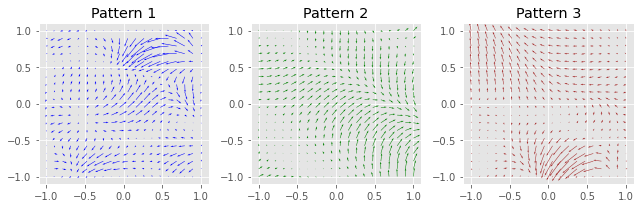

In [3]:
# plots for presentations
fig = plt.figure(figsize=(9,3))
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
Z = np.array([[x[i, j], y[i, j]] for i in range(20) for j in range(20)])


plt.subplot(1, 3, 1)
func = f_true[2]
Y = np.vstack([func(Z[i]) for i in range(400)])
plt.quiver(Z[:,0], Z[:,1], Y[:,0], Y[:,1], color='blue')
plt.title('Pattern '+str(1))
        
plt.subplot(1, 3, 2)
func = f_true[5]
Y = np.vstack([func(Z[i]) for i in range(400)])
plt.quiver(Z[:,0], Z[:,1], Y[:,0], Y[:,1], color='green')
plt.title('Pattern '+str(2))

plt.subplot(1, 3, 3)
func = f_true[7]
Y = np.vstack([func(Z[i]) for i in range(400)])
plt.quiver(Z[:,0], Z[:,1], Y[:,0], Y[:,1], color='brown')
plt.title('Pattern '+str(3))
        
        
plt.tight_layout()
plt.savefig('hidden_patterns.pdf')
plt.show()

In [4]:
g_true = [f_true[2], f_true[5], f_true[7]]

Pi_true_new = np.array([[0.5, 0.5, 0],
                       [0, 0.5, 0.5],
                       [0.5, 0, 0.5]])

T = 100
n = 50
sigma2 = 0.3

#data_train, s_true = sim_new_data2(f_true, Pi_true, T=T, n=n, sigma2=sigma2) #if you dont want any spatial censoring

data_train, s_true, _ = sim_new_data(g_true, Pi_true_new, T=T, n=n, sigma2=sigma2)

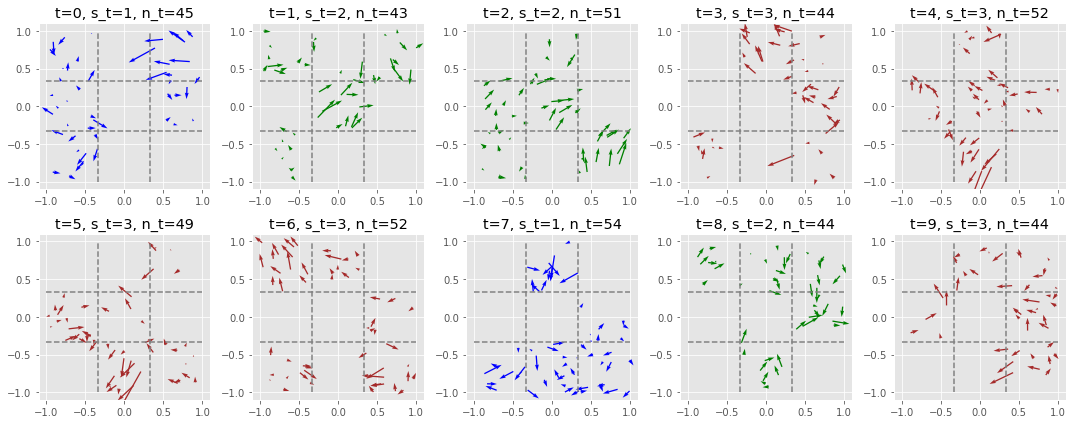

In [5]:
fig = plt.figure(figsize=(15, 6))
colors = ['blue', 'green', 'brown']

shift = 0
for row in range(2):
    for col in range(5):
        idx = row*5 + col
        plt.subplot(2,5,idx+1)
        X, Y = data_train[idx+shift]
        state = s_true[idx+shift]
        plt.quiver(X[:,0], X[:,1], Y[:,0], Y[:,1], color=colors[state])
        plt.hlines(y=1/3, xmin=-1, xmax=1, color='gray', linestyle='dashed')
        plt.hlines(y=-1/3, xmin=-1, xmax=1, color='gray', linestyle='dashed')
        plt.vlines(x=1/3, ymin=-1, ymax=1, color='gray', linestyle='dashed')
        plt.vlines(x=-1/3, ymin=-1, ymax=1, color='gray', linestyle='dashed')
        plt.title('t='+str(idx+shift)+', s_t='+str(state+1)+', n_t='+str(X.shape[0]))
#plt.suptitle('Observations')
plt.tight_layout()

#plt.savefig('observations.pdf')
plt.show()

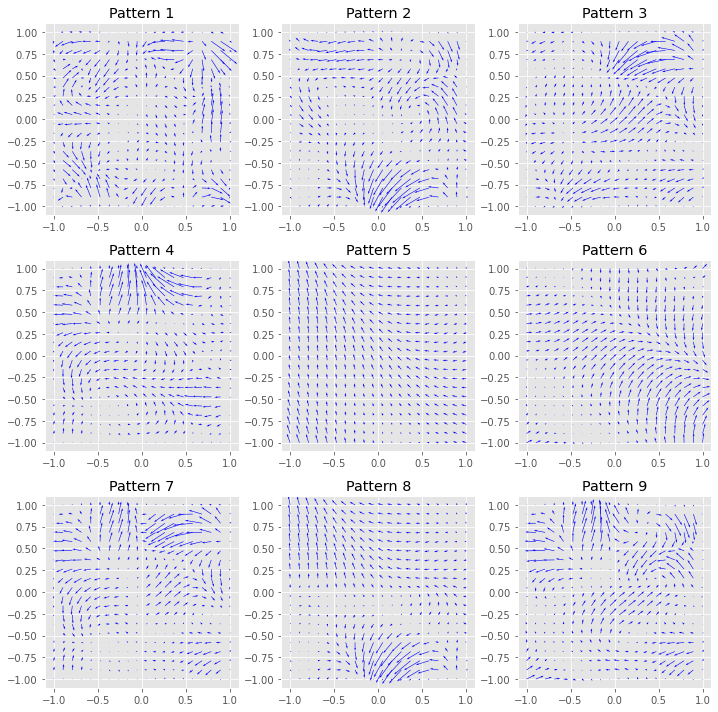

In [6]:
fig = plt.figure(figsize=(10,10))
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
Z = np.array([[x[i, j], y[i, j]] for i in range(20) for j in range(20)])

for row in range(3):
    for col in range(3):
        idx = 3*row + col
        plt.subplot(3, 3, idx+1)
        func = f_true[idx]
        Y = np.vstack([func(Z[i]) for i in range(400)])
        plt.quiver(Z[:,0], Z[:,1], Y[:,0], Y[:,1], color='blue')
        plt.title('Pattern '+str(idx+1))
plt.tight_layout()
plt.show()

In [7]:
Pi_true # thus the temporal chain is simple

array([[0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.9, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.9, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.9, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.9, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.9, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.9],
       [0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1]])

Now let us generate some data.

In [17]:
np.random.seed(200)
T = 600
n = 30
sigma2 = 1

#data_train, s_true = sim_new_data2(f_true, Pi_true, T=T, n=n, sigma2=sigma2) #if you dont want any spatial censoring

data_train, s_true, _ = sim_new_data(f_true, Pi_true, T=T, n=n, sigma2=sigma2)

In [18]:
len(s_true) # = len(s_true)

600

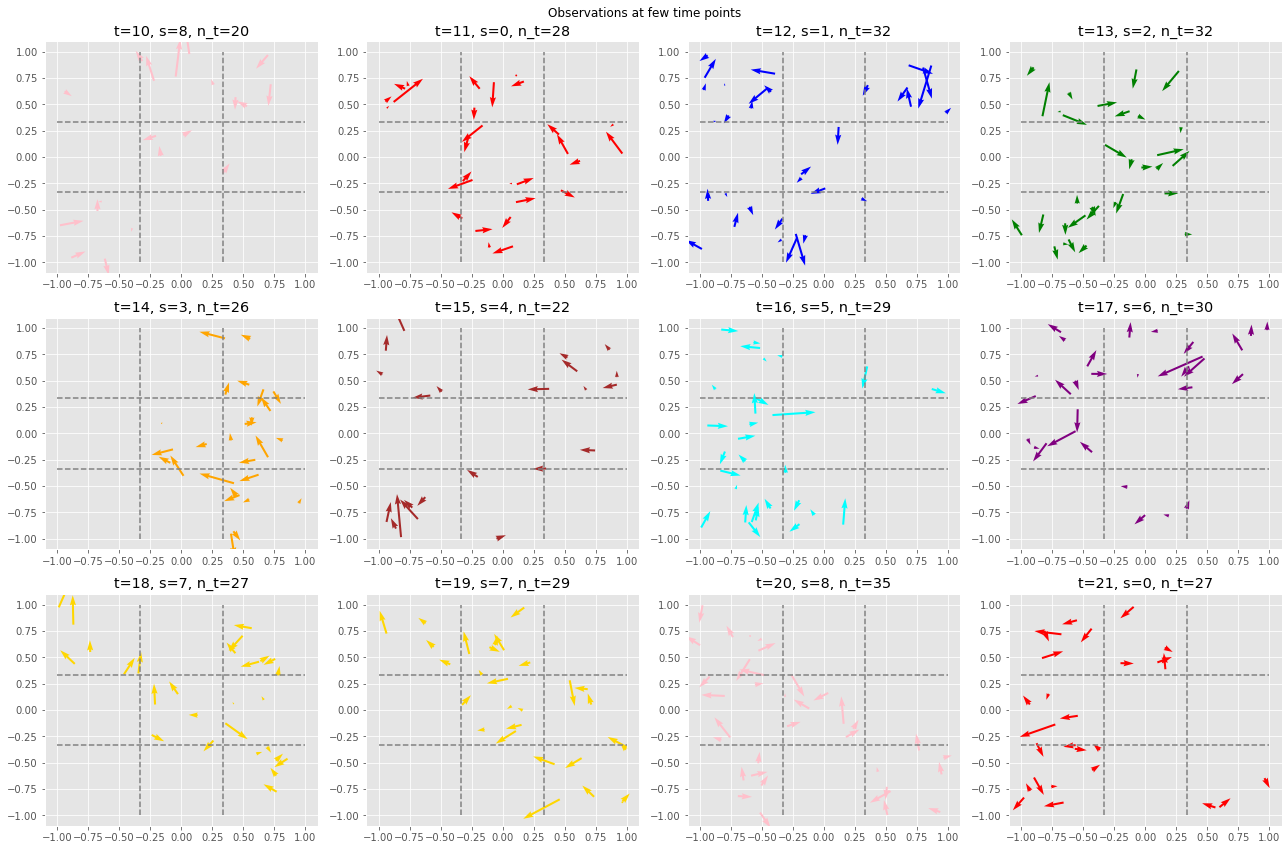

In [19]:
fig = plt.figure(figsize=(18, 12))
colors = ['red', 'blue', 'green', 'orange', 'brown', 'cyan', 'purple', 'gold', 'pink']

shift = 10
for row in range(3):
    for col in range(4):
        idx = row*4 + col
        plt.subplot(3,4,idx+1)
        X, Y = data_train[idx+shift]
        state = s_true[idx+shift]
        plt.quiver(X[:,0], X[:,1], Y[:,0], Y[:,1], color=colors[state])
        plt.hlines(y=1/3, xmin=-1, xmax=1, color='gray', linestyle='dashed')
        plt.hlines(y=-1/3, xmin=-1, xmax=1, color='gray', linestyle='dashed')
        plt.vlines(x=1/3, ymin=-1, ymax=1, color='gray', linestyle='dashed')
        plt.vlines(x=-1/3, ymin=-1, ymax=1, color='gray', linestyle='dashed')
        plt.title('t='+str(idx+shift)+', s='+str(state)+', n_t='+str(X.shape[0]))
plt.suptitle('Observations at few time points')
plt.tight_layout()


In [20]:
# setting up the parameters
iHMM_params = (3,2,1)
m0 = 200
n0 = 4
Lmax = 2
x, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
Z = np.array([[x[i, j], y[i, j]] for i in range(10) for j in range(10)])

Starting Step A
GPs done
blocks done


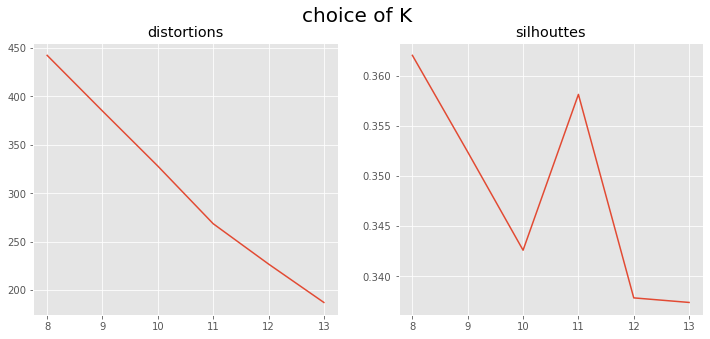

optimal K= 8
Starting Step B
iter: 1
iter: 2
did not converge


In [21]:
from iHMM_GP.main import fit_model

K, s_train, models, loglik, Pi_hat, sigma2_hat, time = fit_model(data_train, m0=m0, Z=Z, n0=n0, iHMM_params=iHMM_params, Lmax=Lmax, n_jobs=-1, verbose=True, high=5)

In [22]:
print('chosen K=', K)
print('time taken=', time)

chosen K= 8
time taken= 158.51293969154358


Let us see how the fitted models look like

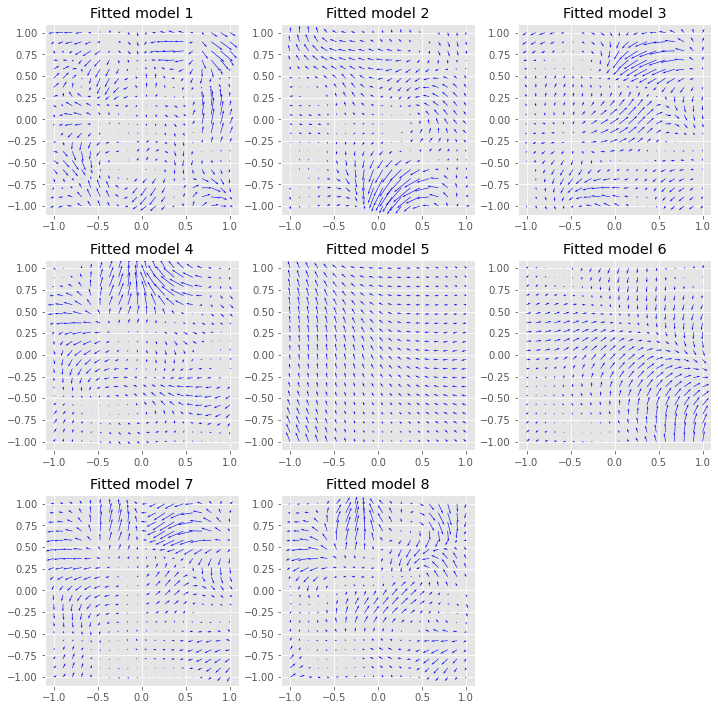

In [23]:
fig = plt.figure(figsize=(10, 13))
x, y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
Z = np.array([[x[i, j], y[i, j]] for i in range(20) for j in range(20)])

for row in range(4):
    for col in range(3):
        idx = 3*row + col
        if (idx < K):
            plt.subplot(4, 3, idx+1)
            model_ = models[idx]
            Y1 = model_[0].predict_f(Z)[0]
            Y2 = model_[1].predict_f(Z)[0]
            plt.quiver(Z[:,0], Z[:,1], Y1, Y2, color='blue')
            plt.title('Fitted model '+str(idx+1))
plt.tight_layout()
plt.show()

Look at the label estimation accuracy (RAND, NMI, V score)

In [24]:
from sklearn.metrics import rand_score, adjusted_mutual_info_score, v_measure_score
train_label_acc = (rand_score(s_true, s_train), adjusted_mutual_info_score(s_true, s_train), v_measure_score(s_true, s_train))
print('training accuracy:', train_label_acc)

est_sizes = [np.sum(s_train==k) for k in range(10)]
print('model sizes:', est_sizes)

true_sizes = [np.sum(s_true==k) for k in range(9)]
print('true sizes:', true_sizes)


training accuracy: (0.975008347245409, 0.9590139039454961, 0.9599431744108231)
model sizes: [64, 132, 67, 68, 66, 65, 68, 70, 0, 0]
true sizes: [64, 66, 67, 68, 66, 65, 68, 65, 71]


# Example 2:

Same setting (use $n=120, \sigma^2=3$), but we have censoring in the spatial domain at each time. 

In [25]:
T = 600
n = 120
sigma2 = 3

np.random.seed(200)
#data_train, s_true = sim_new_data2(f_true, Pi_true, T=T, n=n, sigma2=sigma2) #if you dont want any spatial censoring

data_train, s_true, _ = sim_new_data(f_true, Pi_true, T=T, n=n, sigma2=sigma2)

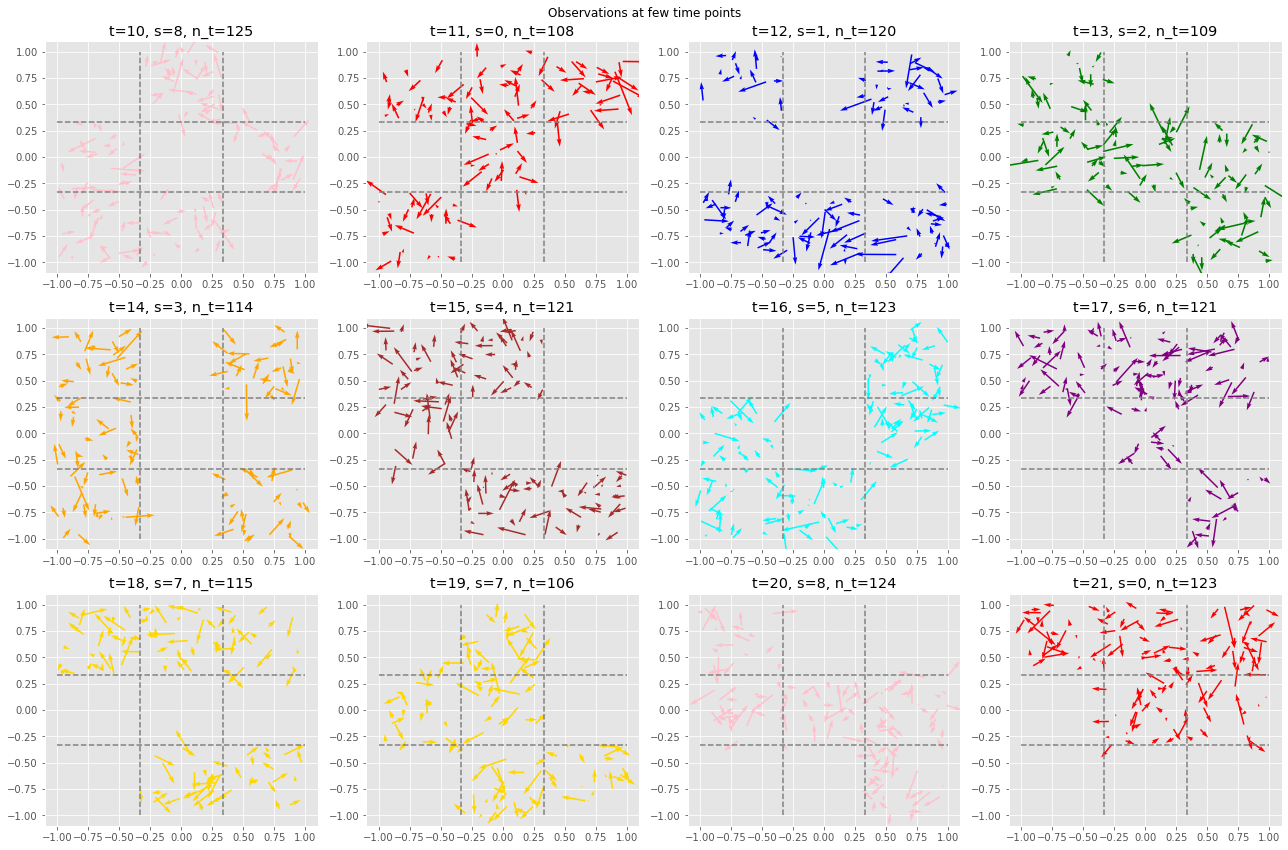

In [26]:
fig = plt.figure(figsize=(18, 12))
colors = ['red', 'blue', 'green', 'orange', 'brown', 'cyan', 'purple', 'gold', 'pink']

shift = 10
for row in range(3):
    for col in range(4):
        idx = row*4 + col
        plt.subplot(3,4,idx+1)
        X, Y = data_train[idx+shift]
        state = s_true[idx+shift]
        plt.quiver(X[:,0], X[:,1], Y[:,0], Y[:,1], color=colors[state])
        plt.hlines(y=1/3, xmin=-1, xmax=1, color='gray', linestyle='dashed')
        plt.hlines(y=-1/3, xmin=-1, xmax=1, color='gray', linestyle='dashed')
        plt.vlines(x=1/3, ymin=-1, ymax=1, color='gray', linestyle='dashed')
        plt.vlines(x=-1/3, ymin=-1, ymax=1, color='gray', linestyle='dashed')
        plt.title('t='+str(idx+shift)+', s='+str(state)+', n_t='+str(X.shape[0]))
plt.suptitle('Observations at few time points')
plt.tight_layout()

In [27]:
# setting up the parameters
iHMM_params = (3,2,1)
m0 = 200
n0 = 3
Lmax = 1
x, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
Z = np.array([[x[i, j], y[i, j]] for i in range(10) for j in range(10)])

Starting Step A
GPs done
blocks done


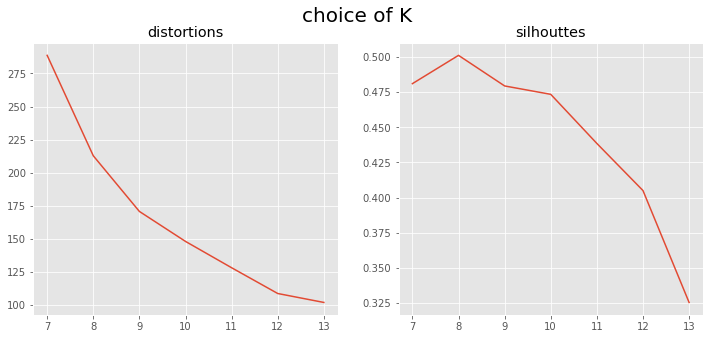

optimal K= 8
Starting Step B
iter: 1
did not converge


In [28]:
from iHMM_GP.main import fit_model

K, s_train, models, loglik, Pi_hat, sigma2_hat, time = fit_model(data_train, m0=m0, Z=Z, n0=n0, iHMM_params=iHMM_params, Lmax=Lmax, n_jobs=-1, verbose=True, high=5)

In [29]:
print('chosen K=', K)
print('time taken=', time)

chosen K= 8
time taken= 273.2267277240753


In [30]:
from sklearn.metrics import rand_score, adjusted_mutual_info_score, v_measure_score
train_label_acc = (rand_score(s_true, s_train), adjusted_mutual_info_score(s_true, s_train), v_measure_score(s_true, s_train))
print('training accuracy:', train_label_acc)

est_sizes = [np.sum(s_train==k) for k in range(9)]
print('model sizes:', est_sizes)

true_sizes = [np.sum(s_true==k) for k in range(9)]
print('true sizes:', true_sizes)

training accuracy: (0.976126878130217, 0.963500190248076, 0.9643275009437893)
model sizes: [64, 131, 67, 68, 66, 65, 68, 71, 0]
true sizes: [64, 66, 67, 68, 66, 65, 68, 65, 71]


# Example 3:

Now we look at functions from $R\to R$. This is setup EXP1

In [31]:
f_true = []
for i in range(4):
    f_true.append(create_f1d(seed=10*i, plot=False))
    
Pi_true = np.array([[0.2, 0.8, 0, 0],
                   [0, 0.2, 0.8, 0],
                   [0, 0, 0.2, 0.8],
                   [0.8, 0, 0, 0.2]])

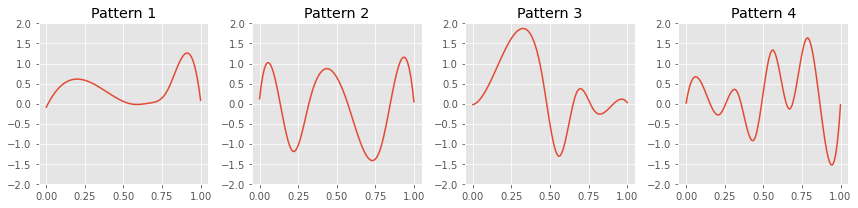

In [32]:
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(12, 3))

for k in range(4):
    y = f_true[k](x)
    plt.subplot(1, 4, k+1).set_title('Pattern '+str(k+1))
    plt.plot(x, y)
    plt.ylim(-2,2)
plt.tight_layout()
plt.show()

In [33]:
T = 400
n = 60
sigma2 = 4
np.random.seed(200)

data_train, s_true = sim_new_data_1d(f_true, Pi_true, T=T, n=n, sigma2=sigma2)

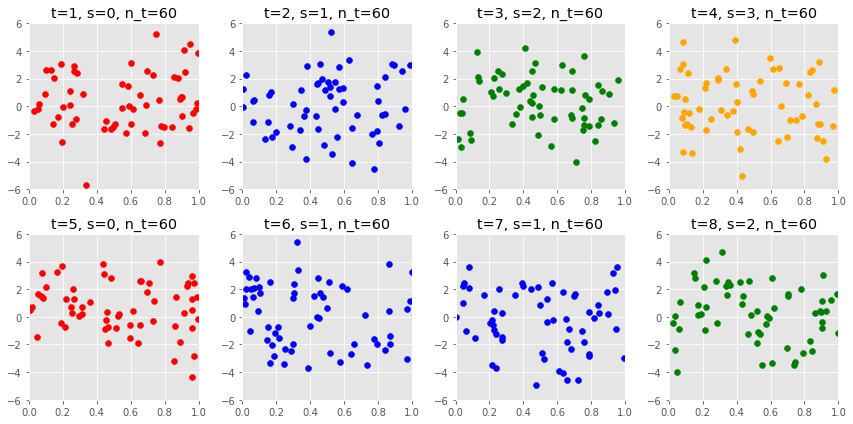

In [34]:
fig = plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', 'orange', 'gold']

for r in range(2):
    for c in range(4):
        idx = r*4+c
        x, y = data_train[idx]
        plt.subplot(2, 4, idx+1).set_title('t='+str(idx+1) + ', s=' + str(s_true[idx]) + ', n_t='+str(x.shape[0]))
        plt.scatter(x, y, color=colors[s_true[idx]])
        plt.ylim(-6,6)
        plt.xlim(0,1)
plt.tight_layout()
plt.show()

In [35]:
# setting up the parameters
iHMM_params = (3,2,1)
m0 = 100
n0 = 3
Lmax = 1
Z = np.linspace(0,1,60)[:,None]

Starting Step A
GPs done
blocks done


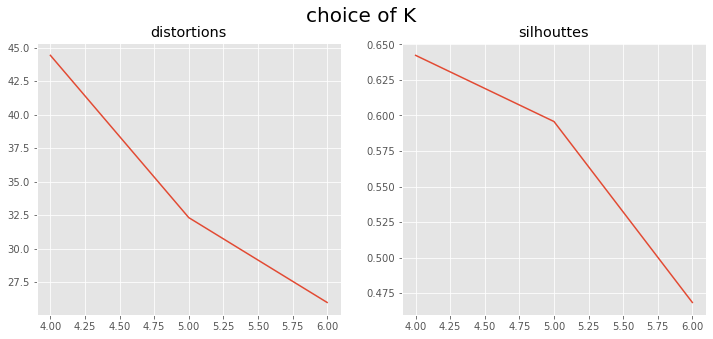

optimal K= 4
Starting Step B
iter: 1
did not converge


In [36]:
from iHMM_GP.main import fit_model

K, s_train, models, loglik, Pi_hat, sigma2_hat, time = fit_model(data_train, m0=m0, Z=Z, n0=n0, iHMM_params=iHMM_params, Lmax=Lmax, n_jobs=-1, verbose=True, high=2)

In [37]:
print('chosen K=', K)
print('time taken=', time)

chosen K= 4
time taken= 33.95453071594238


In [38]:
from sklearn.metrics import rand_score, adjusted_mutual_info_score, v_measure_score
train_label_acc = (rand_score(s_true, s_train), adjusted_mutual_info_score(s_true, s_train), v_measure_score(s_true, s_train))
print('training accuracy:', train_label_acc)

est_sizes = [np.sum(s_train==k) for k in range(4)]
print('model sizes:', est_sizes)

true_sizes = [np.sum(s_true==k) for k in range(4)]
print('true sizes:', true_sizes)

training accuracy: (0.9876315789473684, 0.9550061932219914, 0.9553759811323222)
model sizes: [92, 113, 99, 96]
true sizes: [93, 111, 99, 97]


# Example 4:

Now we add spatial censoring. This is EXP2

In [45]:
f_true = []
for i in range(4):
    f_true.append(create_f1d(seed=10*i, plot=False))
    
Pi_true = np.array([[0.2, 0.8, 0, 0],
                   [0, 0.2, 0.8, 0],
                   [0, 0, 0.2, 0.8],
                   [0.8, 0, 0, 0.2]])

T = 400
n = 40
sigma2 = 4
np.random.seed(200)
data_, s_true = sim_new_data_1d(f_true, Pi_true, T=T, n=2*n, sigma2=sigma2)
data_ = censor1d(data_)

data_train = []
for t in range(T):
    X, Y = data_[t]
    data_train.append((X[:n,:],Y[:n,:]))

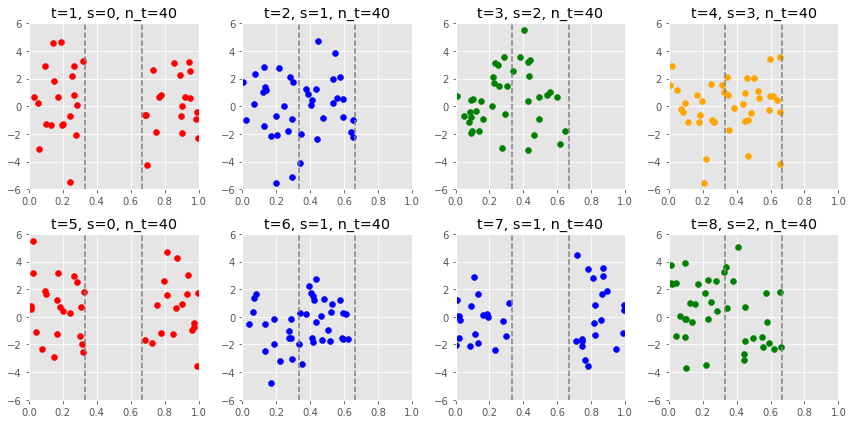

In [46]:
fig = plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', 'orange', 'gold']

for r in range(2):
    for c in range(4):
        idx = r*4+c
        x, y = data_train[idx]
        plt.subplot(2, 4, idx+1).set_title('t='+str(idx+1) + ', s=' + str(s_true[idx]) + ', n_t='+str(x.shape[0]))
        plt.scatter(x, y, color=colors[s_true[idx]])
        plt.vlines(x=1/3, ymin=-6, ymax=6, color='gray', linestyle='dashed')
        plt.vlines(x=2/3, ymin=-6, ymax=6, color='gray', linestyle='dashed')
        plt.ylim(-6,6)
        plt.xlim(0,1)
plt.tight_layout()
plt.show()

In [47]:
# setting up the parameters
iHMM_params = (3,2,1)
m0 = 100
n0 = 3
Lmax = 1
Z = np.linspace(0,1,60)[:,None]

Starting Step A
GPs done
blocks done


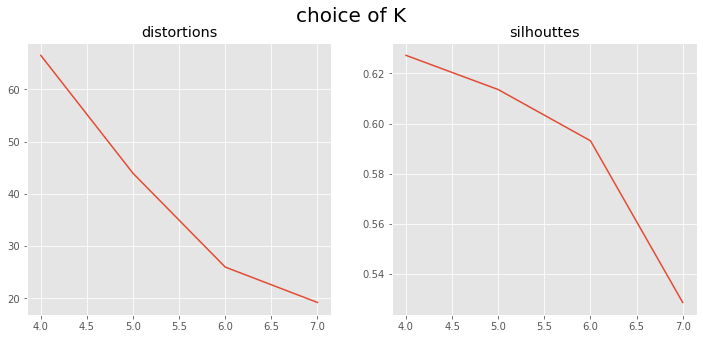

optimal K= 4
Starting Step B
iter: 1
did not converge


In [48]:
from iHMM_GP.main import fit_model

K, s_train, models, loglik, Pi_hat, sigma2_hat, time = fit_model(data_train, m0=m0, Z=Z, n0=n0, iHMM_params=iHMM_params, Lmax=Lmax, n_jobs=-1, verbose=True, high=2)

In [49]:
print('chosen K=', K)
print('time taken=', time)

chosen K= 4
time taken= 43.47525072097778


In [50]:
from sklearn.metrics import rand_score, adjusted_mutual_info_score, v_measure_score
train_label_acc = (rand_score(s_true, s_train), adjusted_mutual_info_score(s_true, s_train), v_measure_score(s_true, s_train))
print('training accuracy:', train_label_acc)

est_sizes = [np.sum(s_train==k) for k in range(4)]
print('model sizes:', est_sizes)

true_sizes = [np.sum(s_true==k) for k in range(4)]
print('true sizes:', true_sizes)

training accuracy: (0.955, 0.8673371884612489, 0.868427886456885)
model sizes: [106, 110, 97, 87]
true sizes: [93, 111, 99, 97]
